In [31]:
import pandas as pd

# 指定檔案路徑
file_path = "Hyperchloremia and DKA Dataset .xlsx"

# 讀取 Excel 並指定正確的標題行
df = pd.read_excel(file_path, header=1)  # 1 表示第二行為標題（索引從 0 開始）

# 查看資料
print(df)


     Age (years)  Weight (kg)  BMI (kg/m2)  \
0             60         96.0         29.7   
1             50        103.7         25.5   
2             25         85.5         23.6   
3             47        130.5         43.8   
4             61         46.5         20.2   
..           ...          ...          ...   
97            52         66.5         25.0   
98            19         72.8         21.8   
99            30        108.9         31.0   
100           63         60.0         28.3   
101           18         54.4         23.9   

     Diabetes Type (type 1 = 0, type 2 = 1)  Gender (0 = male, 1 = female)  \
0                                         1                              0   
1                                         1                              0   
2                                         0                              0   
3                                         0                              1   
4                                         0              

In [33]:
print(df.columns.tolist())

['Age (years)', 'Weight (kg)', 'BMI (kg/m2)', 'Diabetes Type (type 1 = 0, type 2 = 1)', 'Gender (0 = male, 1 = female)', 'Unit (0 = Medical ICU, 1 = Intermediate Care)', 'APACHE II Score', 'Admission Chloride (mEq/L)', 'Peak Chloride (mEq/L)', 'Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)', 'Admission Bicarbonate (mEq/L)', 'Bicarbonate nadir (mEq/L)', 'Baseline Serum Creatinine (mg/dL)', 'Admission Serum Creatinine (mg/dL)', 'Peak Serum Creatinine (mg/dL)', 'Admission Serum pH', 'Serum pH Nadir ', 'Admission Glucose (mg/dL)', 'Glucose Peak (mg/dL)', 'Glucose Nadir (mg/dL)', 'Anion Gap (mEq/L)', 'Delta Gap (mEq/L)', 'Non-anion Gap Acidosis (0 = no, 1 = yes) ', 'Volume of 0.9% NaCl (mL)', 'Volume of 0.45% NaCl (mL)', "Volume of Lactated Ringer's (mL)", 'Volume of Plasma-Lyte (mL)', 'Total IV Fluid Volume (mL)', 'Time to Final DKA Resolution (hours)', 'Time to Initial DKA Resolution (hours)', 'Hospital Length of Stay (hours)', 'Acute Kidney Injury on Admission (0 = no, 

### 數據篩選與分組
根據 Peak Chloride Category 將資料分組為高氯血症與正常氯血症，並比較兩組的治療時間：

In [34]:
# 篩選兩組數據
normochloremia = df[df["Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)"] == 0]
hyperchloremia = df[df["Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)"] == 1]

# 比較兩組的治療時間
print("Normochloremia (正常氯血症):")
print(normochloremia["Time to Final DKA Resolution (hours)"].describe())

print("Hyperchloremia (高氯血症):")
print(hyperchloremia["Time to Final DKA Resolution (hours)"].describe())


Normochloremia (正常氯血症):
count    50.000000
mean     19.185667
std      16.348254
min       3.450000
25%       8.895833
50%      14.233333
75%      20.716667
max      80.950000
Name: Time to Final DKA Resolution (hours), dtype: float64
Hyperchloremia (高氯血症):
count     52.000000
mean      30.850962
std       28.567900
min        5.766667
25%       15.450000
50%       22.341667
75%       35.941667
max      181.383333
Name: Time to Final DKA Resolution (hours), dtype: float64


### 視覺化探索
利用圖表比較高氯血症與正常氯血症的治療時間分佈。

- 直方圖與核密度圖 (Distribution Plot)：

C:\Users\yenchen\AppData\Local\Temp\ipykernel_17368\3446783625.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normochloremia["Time to Final DKA Resolution (hours)"], label="Normochloremia", shade=True)
C:\Users\yenchen\AppData\Local\Temp\ipykernel_17368\3446783625.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hyperchloremia["Time to Final DKA Resolution (hours)"], label="Hyperchloremia", shade=True)


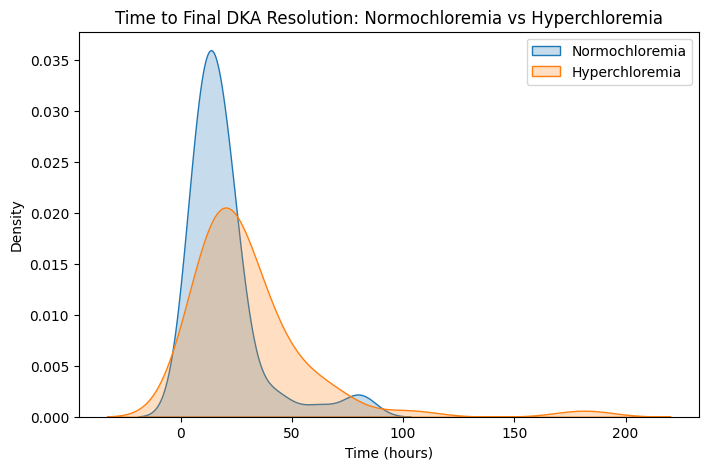

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# 畫出兩組的治療時間分佈
sns.kdeplot(normochloremia["Time to Final DKA Resolution (hours)"], label="Normochloremia", shade=True) 
sns.kdeplot(hyperchloremia["Time to Final DKA Resolution (hours)"], label="Hyperchloremia", shade=True)

plt.title("Time to Final DKA Resolution: Normochloremia vs Hyperchloremia")
plt.xlabel("Time (hours)")
plt.ylabel("Density")
plt.legend()
plt.show()


- 盒形圖

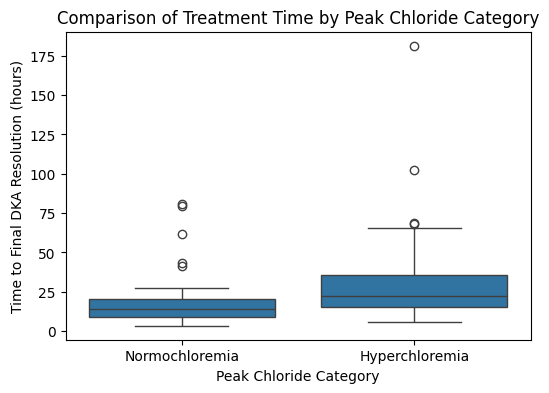

In [45]:

plt.figure(figsize=(6, 4))

sns.boxplot(x="Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)", y="Time to Final DKA Resolution (hours)", data=df)
plt.title("Comparison of Treatment Time by Peak Chloride Category")
plt.xticks([0, 1], ["Normochloremia", "Hyperchloremia"])
plt.xlabel("Peak Chloride Category")
plt.ylabel("Time to Final DKA Resolution (hours)")
plt.show()


### 統計檢驗
檢驗高氯血症是否顯著影響治療時間。

- t 檢驗：

In [46]:
from scipy.stats import ttest_ind

# t 檢驗比較兩組平均治療時間
t_stat, p_value = ttest_ind(
    normochloremia["Time to Final DKA Resolution (hours)"], 
    hyperchloremia["Time to Final DKA Resolution (hours)"], 
    equal_var=False  # 假設兩組變異數不相等
)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}") 
#p-value < 0.05，拒絕虛無假設，表示兩組的平均治療時間有顯著差異。


T-statistic: -2.5432, P-value: 0.0129


### 迴歸分析
進一步考慮其他變數的影響，使用多元迴歸模型來分析高氯血症對治療時間的獨立影響。

In [49]:
import statsmodels.api as sm

# 建立回歸模型
X = df[["Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)"]]  # 解釋變數
X = sm.add_constant(X)  # 加入常數項
y = df["Time to Final DKA Resolution (hours)"]  # 應變數

model = sm.OLS(y, X).fit()

# 輸出模型摘要
print(model.summary())


                                     OLS Regression Results                                     
Dep. Variable:     Time to Final DKA Resolution (hours)   R-squared:                       0.060
Model:                                              OLS   Adj. R-squared:                  0.050
Method:                                   Least Squares   F-statistic:                     6.339
Date:                                  Wed, 08 Jan 2025   Prob (F-statistic):             0.0134
Time:                                          01:16:25   Log-Likelihood:                -465.27
No. Observations:                                   102   AIC:                             934.5
Df Residuals:                                       100   BIC:                             939.8
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                              

為了探索控制年齡變數後，是否有高氯血症仍然會影響治療時間，可以採用多元迴歸分析，將 Time to Final DKA Resolution (hours) 作為應變數，並將 Peak Chloride Category 和 Age (years) 作為自變數，建立迴歸模型。

In [52]:
import statsmodels.api as sm

# 自變數 (加上常數項)
X = df[['Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)', 'Age (years)']]
X = sm.add_constant(X)  # 增加截距項

# 應變數
y = df['Time to Final DKA Resolution (hours)']

# 建立多元迴歸模型
model = sm.OLS(y, X).fit()

# 輸出模型摘要
print(model.summary())


                                     OLS Regression Results                                     
Dep. Variable:     Time to Final DKA Resolution (hours)   R-squared:                       0.077
Model:                                              OLS   Adj. R-squared:                  0.058
Method:                                   Least Squares   F-statistic:                     4.111
Date:                                  Wed, 08 Jan 2025   Prob (F-statistic):             0.0193
Time:                                          14:40:18   Log-Likelihood:                -464.33
No. Observations:                                   102   AIC:                             934.7
Df Residuals:                                        99   BIC:                             942.5
Df Model:                                             2                                         
Covariance Type:                              nonrobust                                         
                              


### **1. 為什麼說是「控制年齡」？**
- 您的回歸模型是多元線性回歸，其中包括兩個自變數：`Peak Chloride Category` 和 `Age (years)`。
- 模型公式如下：

  $\text{Time to Final DKA Resolution (hours)} = \beta_0 + \beta_1 (\text{Peak Chloride Category}) + \beta_2 (\text{Age}) + \epsilon$
- 在這個模型中，`Age` 作為一個自變數，表示我們考慮了年齡對治療時間的潛在影響。
- 這樣一來，`Peak Chloride Category` 的係數（11.6728）反映的是當**年齡固定不變**（或控制住年齡影響）時，高氯血症和正常氯血症患者在治療時間上的平均差異。

---

### **2. 控制變數的機制**
- 在多元回歸中，每個變數的係數（如 $\beta_1$ 和 $\beta_2$）是在**控制其他變數的影響**後估計的。
- 也就是說，回歸模型會將 `Age` 的影響從因變數（`Time to Final DKA Resolution`）中分離出來，確保 `Peak Chloride Category` 的係數只反映這個變數本身的影響，而不受年齡的干擾。

---

### **3. 舉例說明**
- 假設我們不控制年齡（即不將 `Age` 納入模型），那麼 `Peak Chloride Category` 的係數可能受到年齡的混淆效應影響。例如：
  - 如果高氯血症患者年齡普遍偏大，而年齡本身可能與治療時間相關，未控制年齡的模型可能會高估或低估 `Peak Chloride Category` 的影響。
- 在當前模型中，因為已經將 `Age` 納入作為控制變數，所以 `Peak Chloride Category` 的係數反映的是高氯血症與正常氯血症的**純粹影響**。

---

### **4. 如何判斷模型是否控制了年齡？**
- 您可以通過模型的變數來檢查：
  - `Age` 被納入模型，且其 p 值、係數等結果顯示它的影響已經被計算進去。
- 如果您在回歸模型中移除 `Age`，再比較 `Peak Chloride Category` 的係數，可能會發現該係數有所變化，這就是未控制變數導致的混淆效應。

---

### **5. 總結**
「控制年齡的條件下」的意思是：
- 模型中已納入 `Age` 作為自變數。
- 因此，`Peak Chloride Category` 的係數（11.6728）是**在排除了年齡對治療時間的影響後，兩組患者治療時間的顯著差異**。

這也是多元回歸分析的一個核心特性，即在同一模型中同時檢測多個變數的影響，並「控制」掉其他變數對結果的干擾。

<Figure size 800x600 with 0 Axes>

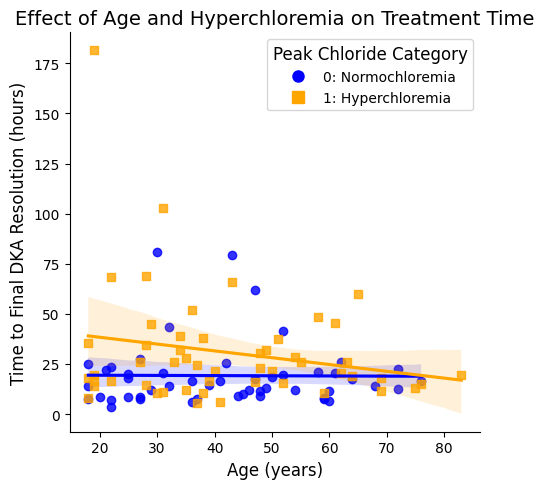

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# 繪製分組回歸圖
plt.figure(figsize=(8, 6))
sns.lmplot(
    data=df,
    x='Age (years)',
    y='Time to Final DKA Resolution (hours)',
    hue='Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)',
    markers=['o', 's'],  # normochloremia 圓圈，hyperchloremia 方形
    palette=['blue', 'orange'],  
    # ci=None,  # 信賴區間
    legend=False  # 關閉預設圖例
)

# 添加標題與軸標籤
plt.title("Effect of Age and Hyperchloremia on Treatment Time", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Time to Final DKA Resolution (hours)", fontsize=12)

# 修正圖例
plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='blue', label='0: Normochloremia', markersize=8, linestyle=''),
        plt.Line2D([0], [0], marker='s', color='orange', label='1: Hyperchloremia', markersize=8, linestyle=''),
    ],
    title="Peak Chloride Category",
    loc='upper right',
    fontsize=10,
    title_fontsize=12
)

# 顯示圖表
plt.tight_layout()
plt.show()


從圖中可以看出幾個趨勢：

- 高氯血症 (橘點)：

總體上，橘色的高氯血症組 (Peak Chloride Category = 1) 的治療時間分布較廣，並且在一些年齡段（如年輕患者）中，治療時間有更高的偏移值（例如接近 100 小時以上）。
正常氯血症 (藍點)：

- 藍色的正常氯血症組 (Peak Chloride Category = 0) 

整體治療時間相對集中，大部分治療時間都分布在 25 小時以下。


- 年齡的影響：

隨著年齡增加，治療時間似乎在高氯血症和正常氯血症兩組中都有所下降，但下降趨勢在高氯血症組（橘色回歸線）中較為平緩。

### 初步結論：
高氯血症患者的治療時間在大部分年齡範圍內都高於正常氯血症患者，特別是在年輕患者中，差異可能更明顯。
隨著年齡的增加，治療時間的差異逐漸縮小。
<hr>

為了控制性別（`Gender`）的影響來觀察 `Peak Chloride Category` 是否仍然對治療時間有顯著影響，可以使用多元回歸模型。以下是實施步驟：

### **1. 模型公式**
設置多元線性回歸模型如下：

$\text{Time to Final DKA Resolution (hours)} = \beta_0 + \beta_1 (\text{Peak Chloride Category}) + \beta_2 (\text{Gender}) + \epsilon$

- $\beta_1$：在控制性別（`Gender`）影響後，`Peak Chloride Category`（是否高氯血症）對治療時間的影響。
- $\beta_2$：性別（`Gender`，男/女）對治療時間的影響。

---

### **2. 進行回歸分析**

這樣可以直觀展示不同性別和氯血症狀態下治療時間的分佈情況。

In [64]:
import statsmodels.api as sm

# 假設資料集名稱為 df，並包含變數 'Peak Chloride Category', 'Time to Final DKA Resolution', 'Gender'

# 定義自變數和因變數
X = df[['Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)', 'Gender (0 = male, 1 = female)']]  # 自變數
y = df['Time to Final DKA Resolution (hours)']       # 因變數

# 添加常數項（截距）
X = sm.add_constant(X)

# 建立回歸模型
model = sm.OLS(y, X)
results = model.fit()

# 印出回歸結果
print(results.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Time to Final DKA Resolution (hours)   R-squared:                       0.061
Model:                                              OLS   Adj. R-squared:                  0.042
Method:                                   Least Squares   F-statistic:                     3.191
Date:                                  Sat, 11 Jan 2025   Prob (F-statistic):             0.0454
Time:                                          00:38:50   Log-Likelihood:                -465.21
No. Observations:                                   102   AIC:                             936.4
Df Residuals:                                        99   BIC:                             944.3
Df Model:                                             2                                         
Covariance Type:                              nonrobust                                         
                              


### **3. 解讀回歸結果**
假設輸出的回歸結果包括以下資訊：
- `coef`（係數）：顯示每個變數的影響大小。
- `P>|t|`（p 值）：檢驗該變數是否對因變數有顯著影響（常見顯著性水平為 0.05）。
- 變數解釋：
  - `Peak Chloride Category` 的 p 值：若顯著（如 p < 0.05），則表示在控制性別後，高氯血症和正常氯血症患者在治療時間上有顯著差異。
  - `Gender` 的 p 值：若顯著，則性別本身對治療時間有顯著影響。

---

### **4. 比較兩組的治療時間**
回歸結果顯示 `Peak Chloride Category` 的係數顯著，則可以說明即使在控制性別影響下，高氯血症患者仍比正常氯血症患者需要更長的治療時間。



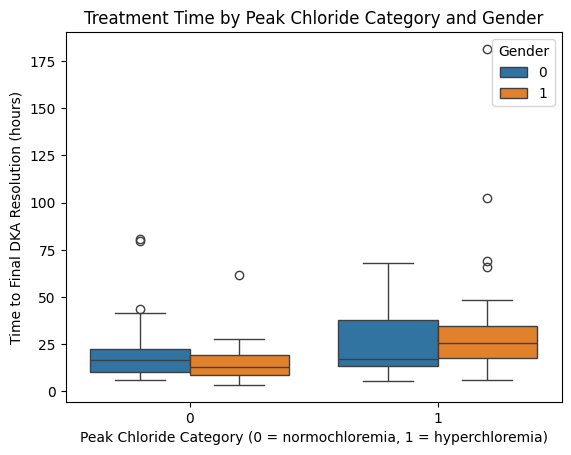

In [77]:

import seaborn as sns
import matplotlib.pyplot as plt

# 分組繪製治療時間的分佈
sns.boxplot(x='Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)',
    y='Time to Final DKA Resolution (hours)',
    hue='Gender (0 = male, 1 = female)',
    data=df)
plt.title('Treatment Time by Peak Chloride Category and Gender')
plt.xlabel('Peak Chloride Category (0 = normochloremia, 1 = hyperchloremia)')
plt.ylabel('Time to Final DKA Resolution (hours)')
plt.legend(title='Gender', loc='upper right')

# , labels=['male', 'female']
plt.show()


### **分析結果**
1. **箱型圖解讀**：
   - **X軸**：`Peak Chloride Category`（0 = normochloremia，1 = hyperchloremia）。
   - **Y軸**：`Time to Final DKA Resolution (hours)`。
   - **分組變數**：性別（Male 和 Female）。
   - 箱型圖顯示治療時間的中位數（箱內中線）、四分位範圍（箱體部分）、及異常值（超出鬚狀部分的點）。

2. **觀察發現**：
   - **正常氯血症（Peak Chloride Category = 0）**：
     - 男性與女性在治療時間的中位數上無明顯差異，且數據分佈集中在 0–25 小時之間，異常值較少。
   - **高氯血症（Peak Chloride Category = 1）**：
     - 男性治療時間的分佈範圍較廣，中位數略高於女性。
     - 女性的治療時間略集中，但仍有部分異常值。
   - **群組間比較**：
     - 高氯血症組（1）的治療時間分佈顯著較正常氯血症組（0）廣泛，尤其是男性組。

3. **初步結論**：
   - 高氯血症患者的治療時間顯著高於正常氯血症患者，且男性可能受到影響較大。
   - 性別（Male vs. Female）在高氯血症患者中似乎略有差異，但影響可能不如高氯血症本身明顯。